In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd

<hr style="border-width:3px; border-color:coral"/>
# Timing results for pressure Poisson solver
<hr style="border-width:3px; border-color:coral"/>


Four sets of solver types are reported. In the full matrix system, the discretized system $A\mathbf x = \mathbf b$ is solved. In the Schur complement system, a linear system for the interface values is solved, and a fast FFT-based solver is used for patch solves.  In either the Full or the Schur approaches, GMRES is used as the basci solver (from HYPRE?) along with an an AMG pre-conditioner, either from HYPRE (BoomerAMG) or using the GPU based implementation AMGX. 

The four simulations reported below are then
* Full matrix with HYPRE used as the pre-conditioner for the full system. [Full matrix (HYPRE)](#fullhypre)
* Schur matrix with HYPRE used as the pre-conditioner for the Schur complement system. [Schur matrix (HYPRE)](#schurhypre)

We also include comparisions between HYPRE and the Schur matrix approach [here](#comparisons).

<hr style="border-width:3px; border-color:coral"/>

## Read in spreadsheet data

This is set up to read the "div 2" data.  To read data from other runs, change the four statements below from   "(2)" to "(3)" or "(4)".   

**Note:** Data may not yet be available in the spreadsheet for these other cases. 

In [3]:
%reload_ext autoreload
%autoreload 2

from results_output import *

In [4]:
timing_results = pd.read_excel("Timing_results.xlsx",sheet_name=None)
div_factor = 4
df_full_hypre  = timing_results["full_hypre ({:d})".format(div_factor)]
df_schur_hypre = timing_results["schur_hypre ({:d})".format(div_factor)]


# For HYPRE results
cols_setup_hypre = ['matrix_setup','hypre_setup']
df_full_hypre['complete_setup'] = df_full_hypre[cols_setup_hypre].sum(axis=1)
df_schur_hypre['complete_setup'] = df_schur_hypre[cols_setup_hypre].sum(axis=1)

cols_solve_full =['linsolve']
cols_solve_schur = ['linsolve','patch_solve']

<a id='fullhypre'></a>
<hr style="border-width:3px; border-color:coral"/>
# Full matrix (HYPRE) 
<hr style="border-width:3px; border-color:coral"/>

In [5]:
import seaborn as sns
cm = sns.light_palette("blue", as_cmap=True)

styler = print_table(df_full_hypre,display_table=False);

# Apply gradient coloring;  use low=, high= to extend domain to [xmin-low*(xmax-xmin),xmax+high*(xmax-xmin)]; defaults=0
styler.background_gradient(subset=['complete_solve','complete_setup'],cmap=cm,low=0,high=0.7)

,p,iterations,residual,error,domain_init,matrix_setup,hypre_setup,linsys_setup,linsolve,complete_solve,complete_setup
0,1,34,8.00e-11,5.75e-05,9.3103,13.0320,46.4757,59.5077,476.6024,476.6024,59.5077
1,2,27,4.39e-10,5.75e-05,5.1269,25.0750,5745.42,5770.4955,190.3332,190.3332,5770.4955
2,4,28,6.47e-10,5.75e-05,2.6115,4.4374,3066.44,3070.8806,170.2305,170.2319,3070.8805
3,8,28,1.93e-09,5.75e-05,1.3450,3.8531,1151.24,1155.0942,141.3615,141.3637,1155.0942
4,16,27,4.08e-10,5.75e-05,0.7136,1.3661,306.353,307.7191,193.3138,193.3144,307.7191
5,32,28,4.40e-10,5.75e-05,0.3489,0.6403,85.7285,86.3688,38.7095,38.7106,86.3688
6,64,26,1.49e-09,5.75e-05,0.1808,0.3294,28.1745,28.5040,20.0270,20.0282,28.5039


## Full matrix (HYPRE) : Setup

<IPython.core.display.Javascript object>


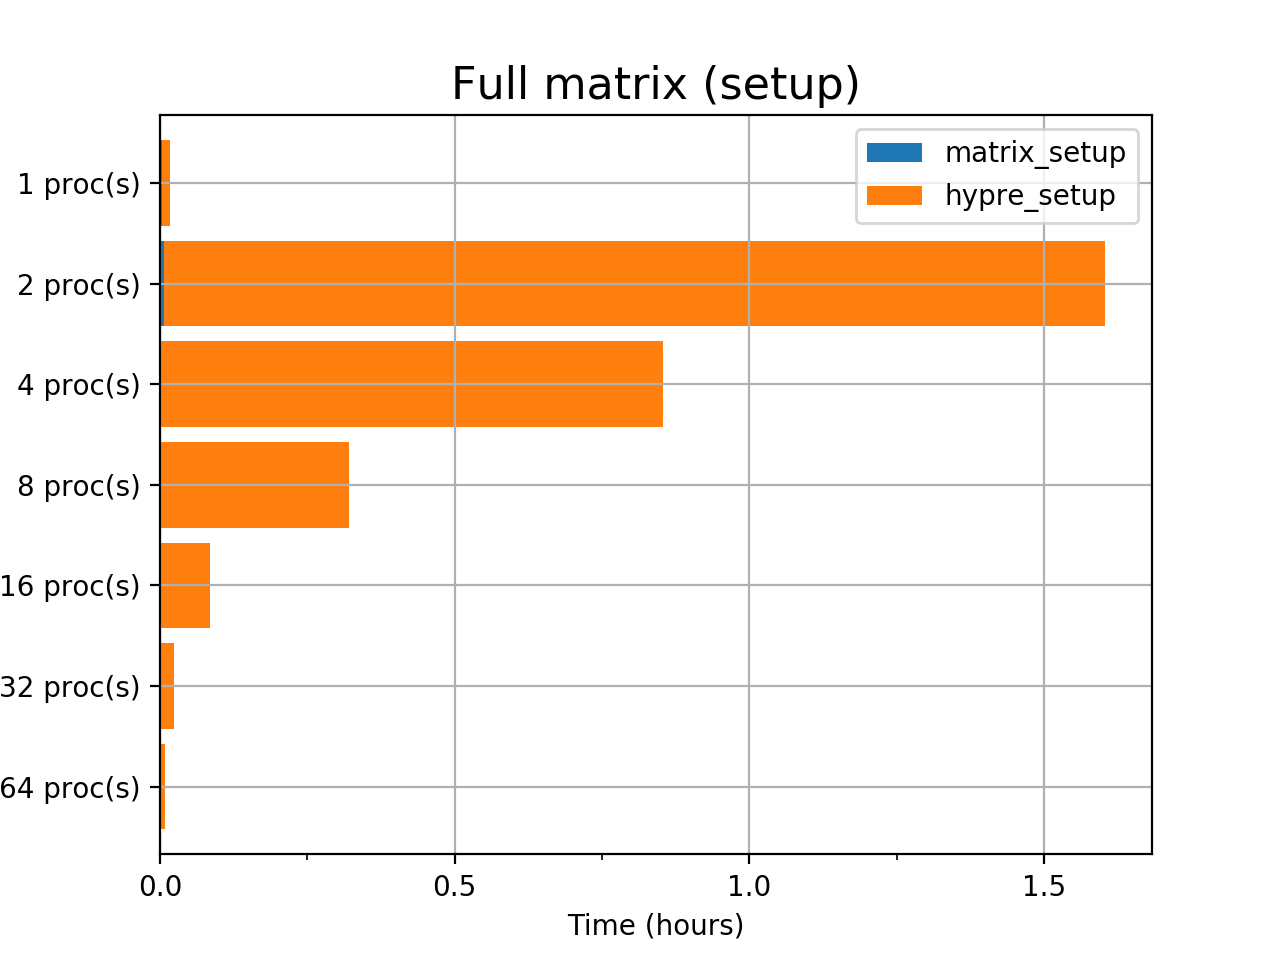

In [6]:
barh_plot(df_full_hypre,cols_setup_hypre)
plt.title('Full matrix (setup)',fontsize=16);

set_xticks(0.5,0.25,units='hours')

## Full matrix (HYPRE) : Solve

<IPython.core.display.Javascript object>


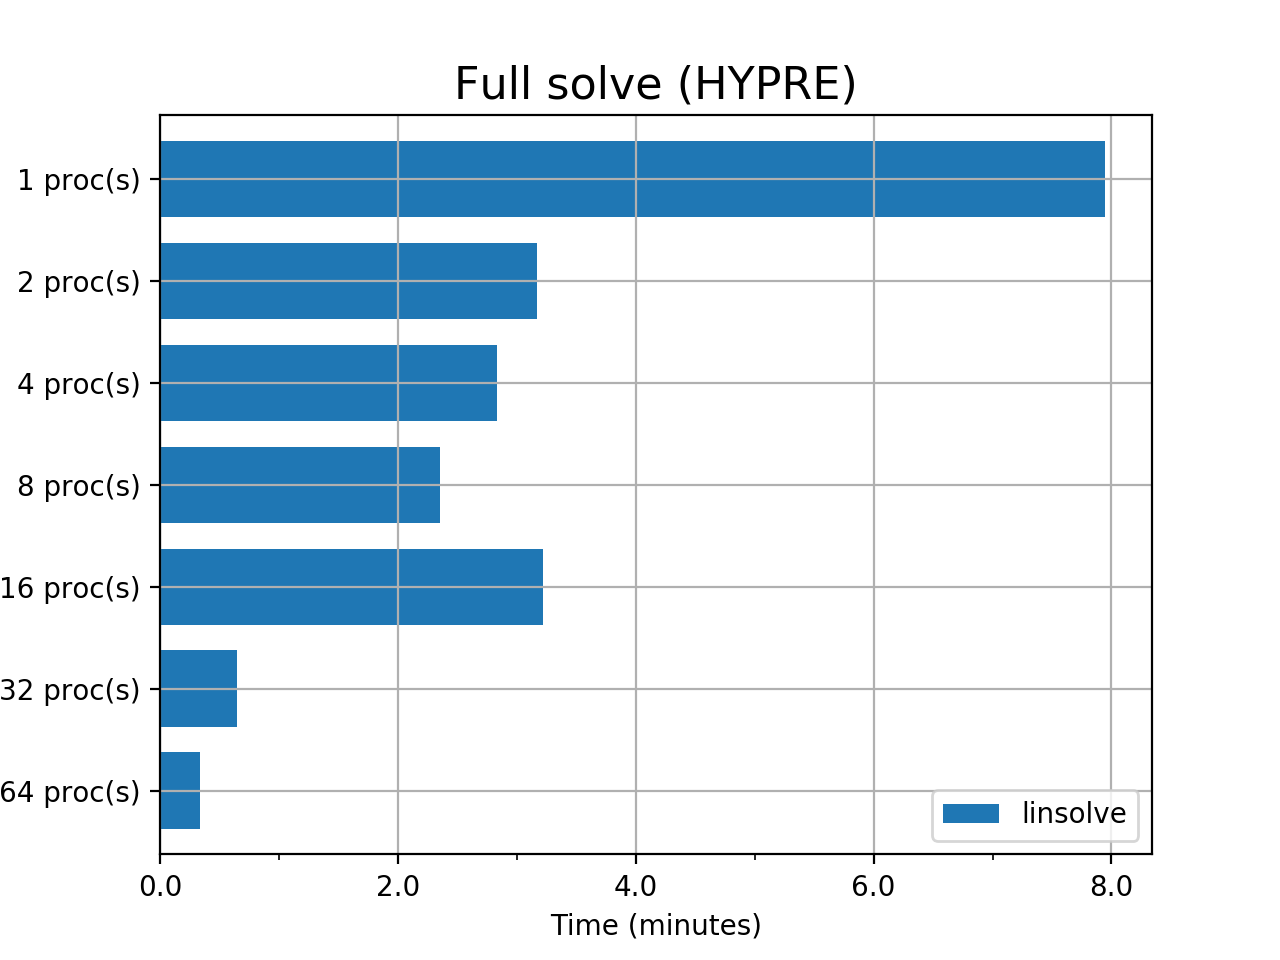

In [7]:
bar_plot(df_full_hypre,cols_solve_full)
plt.title('Full solve (HYPRE)',fontsize=16);
set_xticks(2,1,units='minutes')

## Full matrix (HYPRE) : Strong scaling

<IPython.core.display.Javascript object>


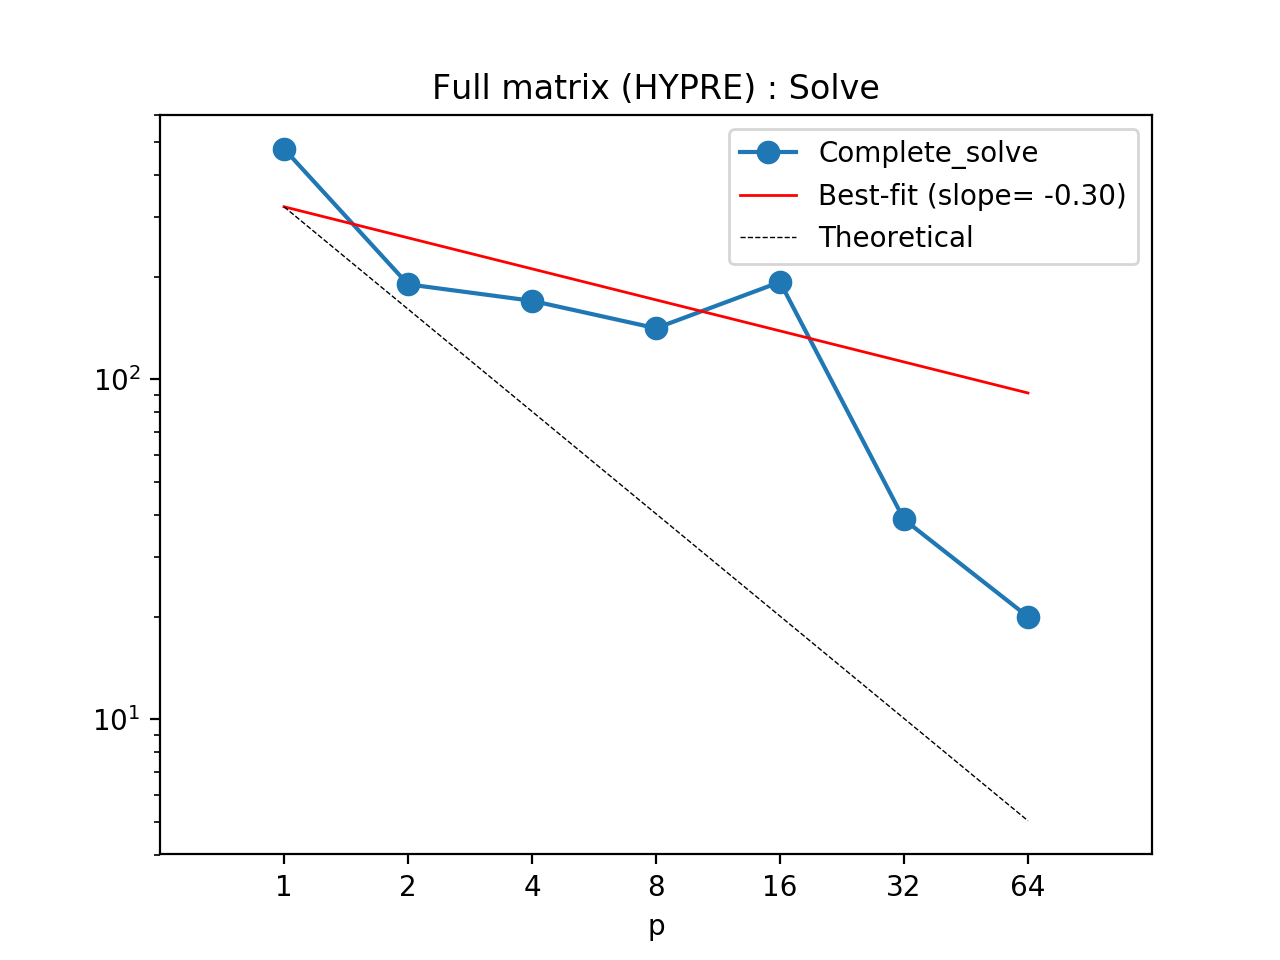

In [8]:
strong_scaling(df_full_hypre,field='complete_solve')
plt.title('Full matrix (HYPRE) : Solve');

## Full matrix (HYPRE) : Efficiency

<IPython.core.display.Javascript object>


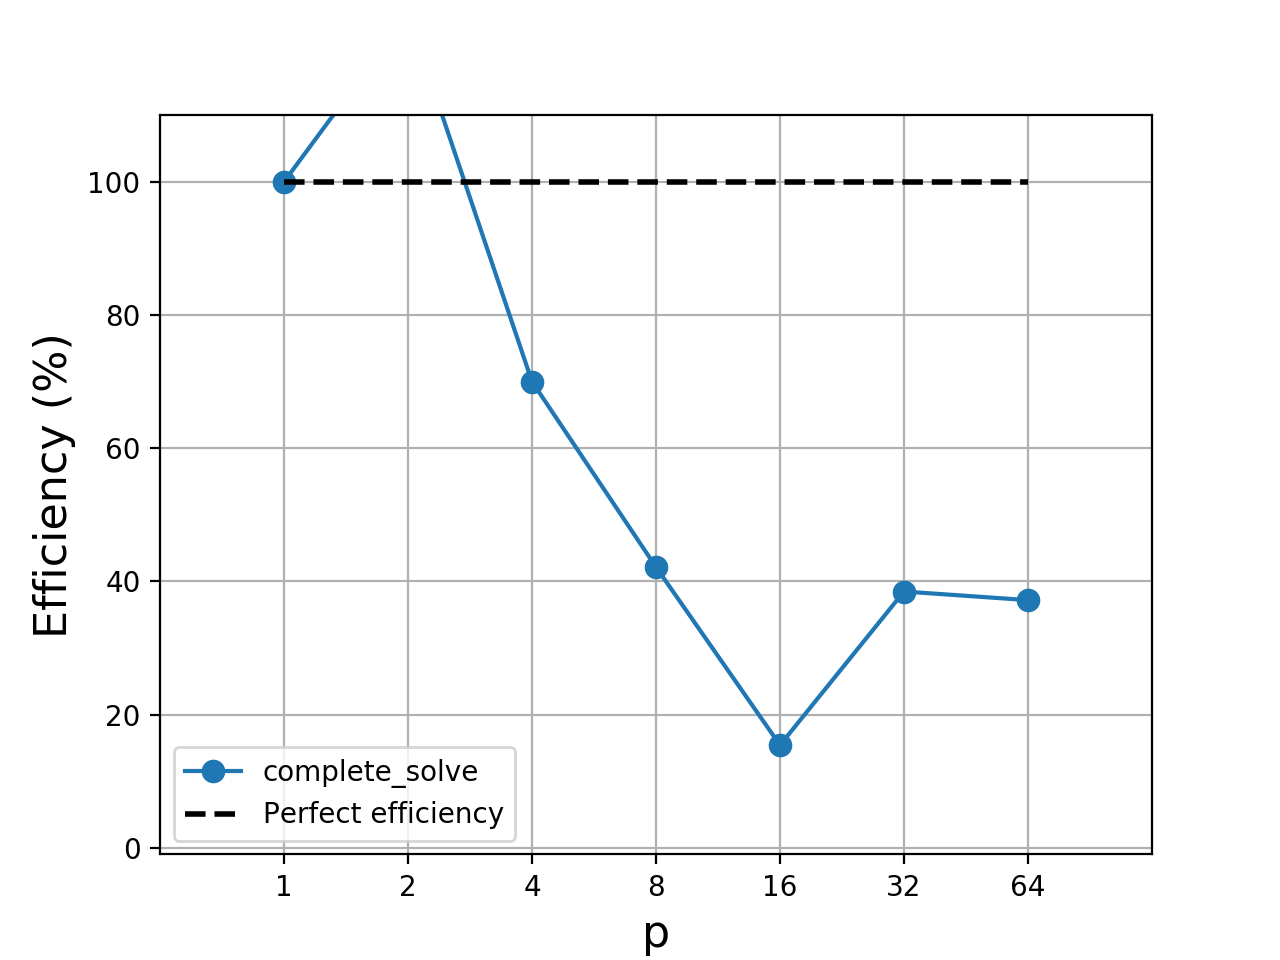

In [9]:
efficiency(df_full_hypre,'complete_solve')

<a id='schurhypre'></a>
<hr style="border-width:3px; border-color:coral"/>
# Schur matrix (HYPRE) 
<hr style="border-width:3px; border-color:coral"/>

In [10]:
styler = print_table(df_schur_hypre,display_table=False);

# Apply gradient coloring;  use low=, high= to extend domain to [xmin-low*(xmax-xmin),xmax+high*(xmax-xmin)]; defaults=0
styler.background_gradient(subset=['complete_solve','complete_setup'],cmap=cm,low=0,high=0.4)

,p,iterations,residual,error,domain_init,matrix_setup,hypre_setup,linsys_setup,linsolve,patch_solve,complete_solve,complete_setup
0,1,18,2.14e-10,5.75e-05,9.4446,40.0887,30.6903,70.7790,126.3492,0.9870,127.3363,70.7790
1,2,18,3.22e-10,5.75e-05,5.2306,42.7231,31.2513,73.9744,63.8765,0.5504,64.4269,73.9744
2,4,17,2.76e-10,5.75e-05,2.6959,81.2467,41.7368,122.9835,37.5106,0.3183,37.8302,122.9835
3,8,17,3.64e-10,5.75e-05,1.3871,156.3589,64.0581,220.4170,24.7683,0.1910,24.9670,220.4170
4,16,17,3.49e-10,5.75e-05,0.7516,361.3782,44.8663,406.2446,19.0831,0.1379,19.2213,406.2445
5,32,17,3.05e-10,5.75e-05,0.3453,1.0041,1.46523,2.4694,18.4243,0.0932,18.5242,2.4694
6,64,17,3.60e-10,5.75e-05,0.1803,0.5388,3.96143,4.5003,8.0837,0.0664,8.1565,4.5003


## Schur matrix (HYPRE) : Setup

Use HYPRE to solve the Schur complement system

<IPython.core.display.Javascript object>


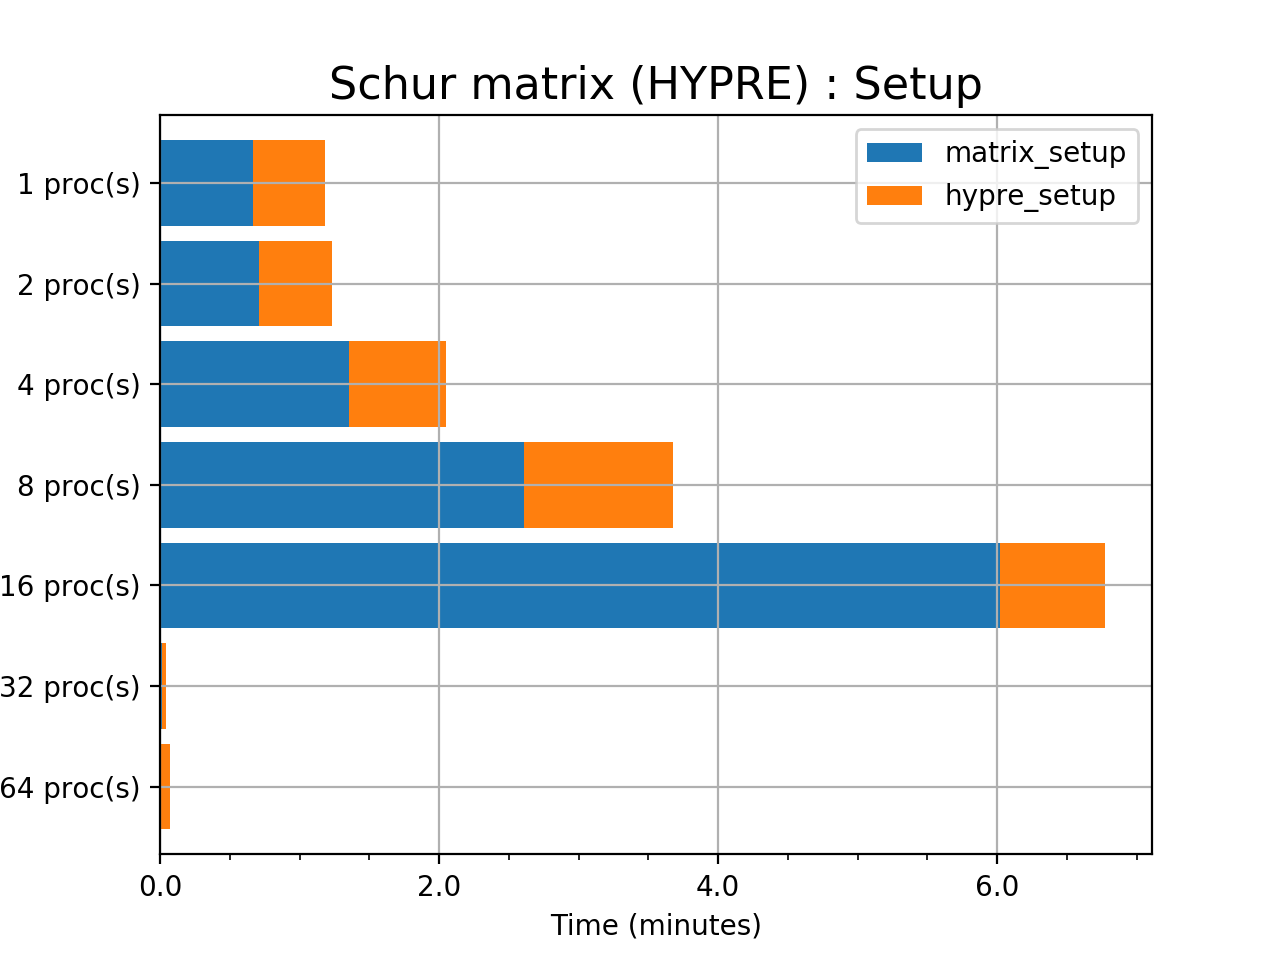

In [11]:
barh_plot(df_schur_hypre,cols_setup_hypre)
plt.title('Schur matrix (HYPRE) : Setup',fontsize=16);
set_xticks(2,0.5,units='minutes')

## Schur matrix (HYPRE) : Solve

<IPython.core.display.Javascript object>


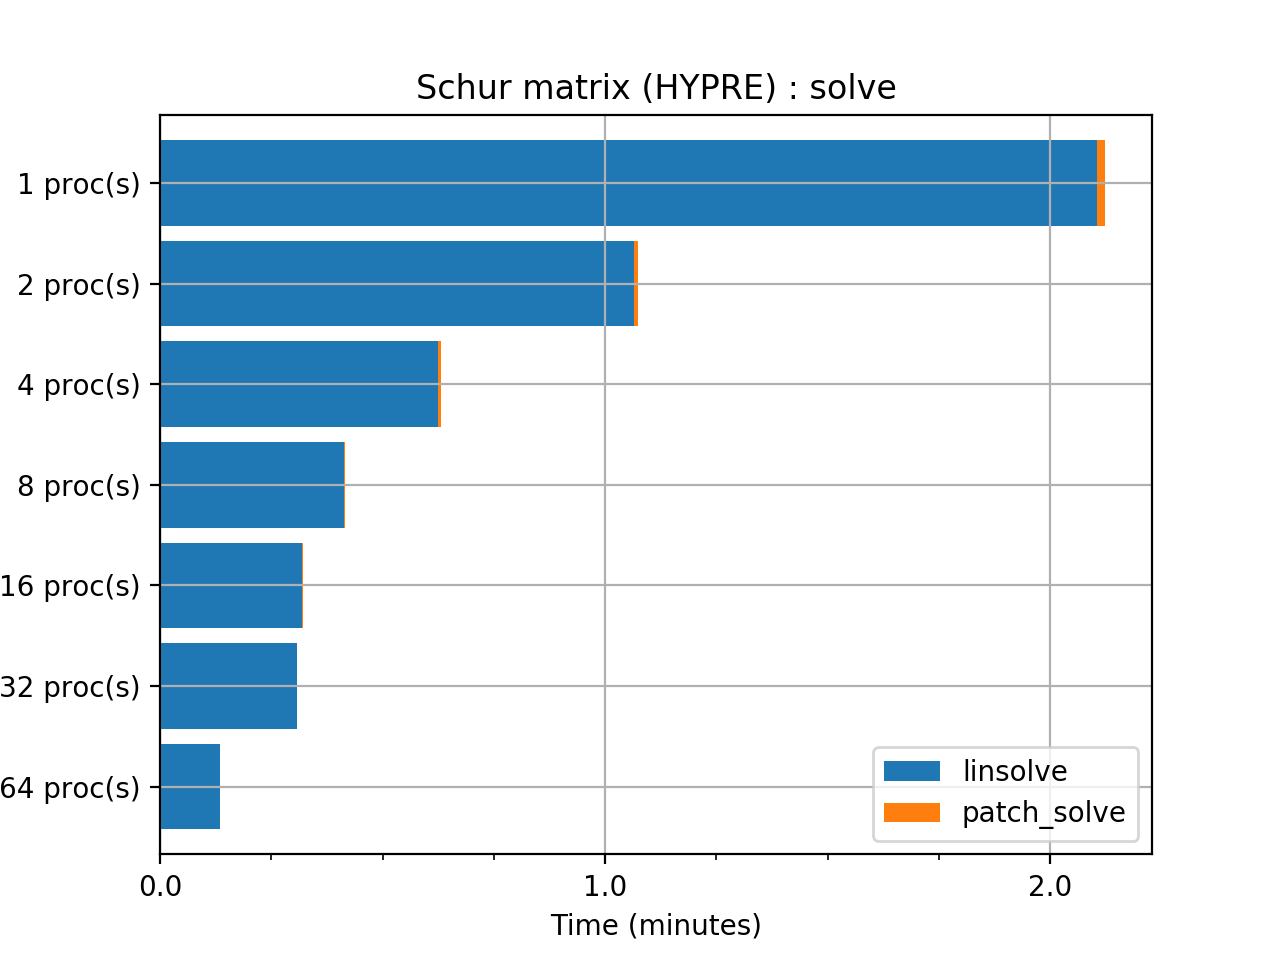

In [12]:
barh_plot(df_schur_hypre,cols_solve_schur)
set_xticks(1,0.25,units='minutes')
plt.title('Schur matrix (HYPRE) : solve');

## Schur matrix (HYPRE) : Strong scaling (solve)

<IPython.core.display.Javascript object>


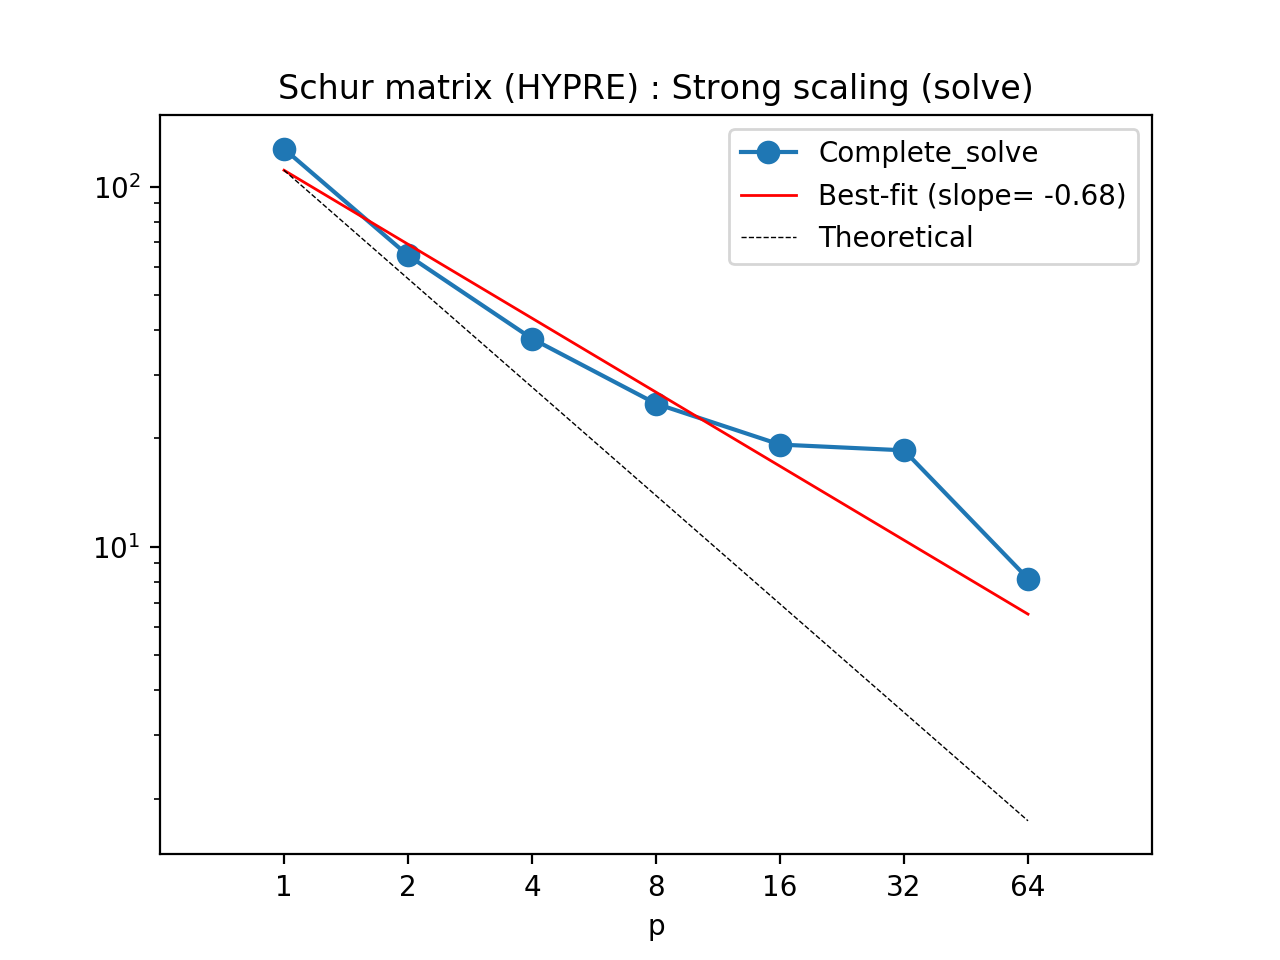

In [13]:
strong_scaling(df_schur_hypre,field='complete_solve')
plt.title('Schur matrix (HYPRE) : Strong scaling (solve)');

## Schur matrix (HYPRE) : Setup vs solve time 

<IPython.core.display.Javascript object>


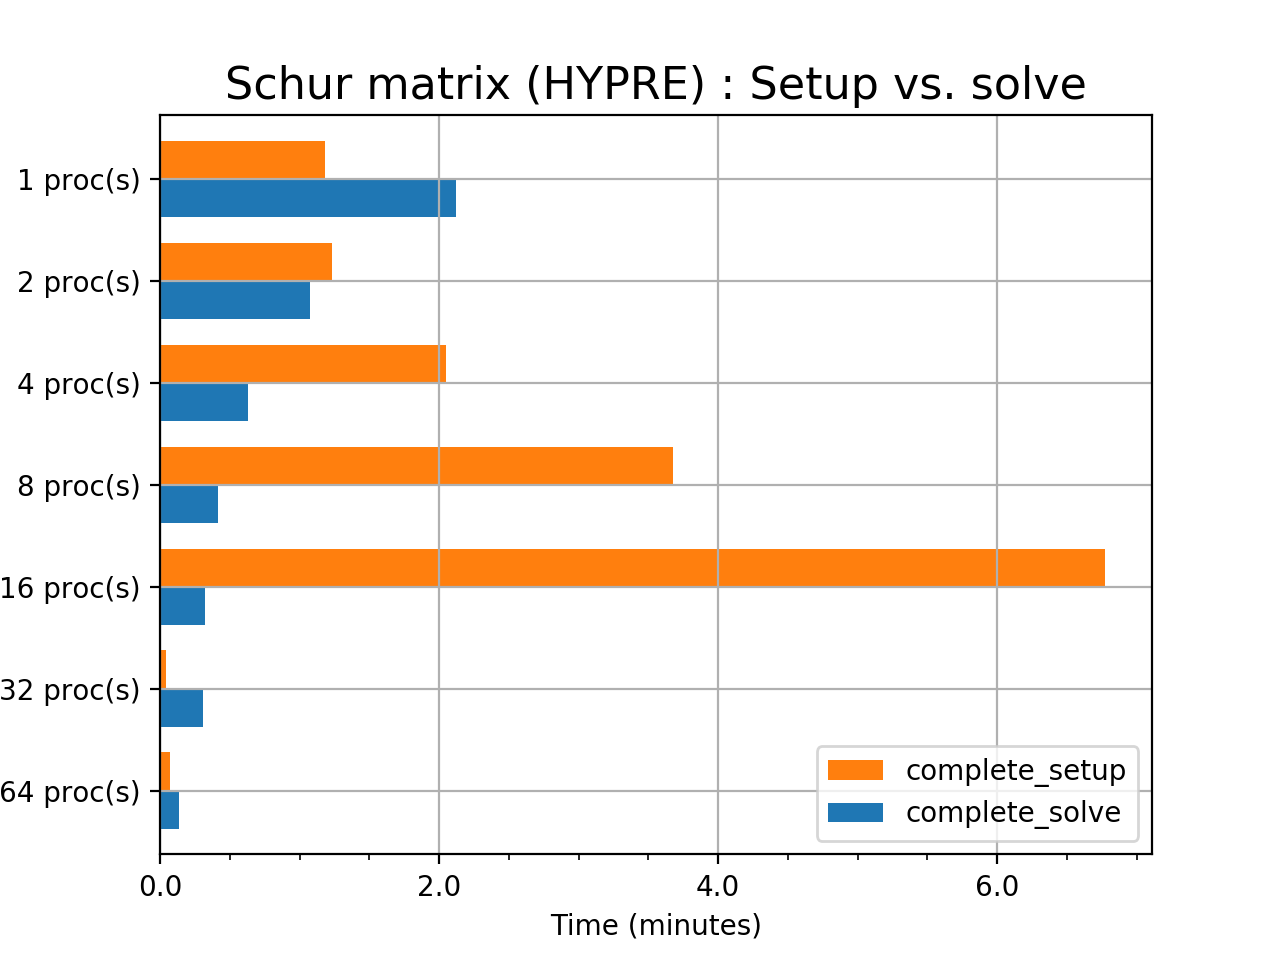

In [14]:
bar_plot(df_schur_hypre,['complete_solve','complete_setup'])

set_xticks(2,0.5,units='minutes')

plt.title('Schur matrix (HYPRE) : Setup vs. solve',fontsize=16);
plt.grid(b=True,which='major')


## Schur matrix (HYPRE) : Efficiency

<IPython.core.display.Javascript object>


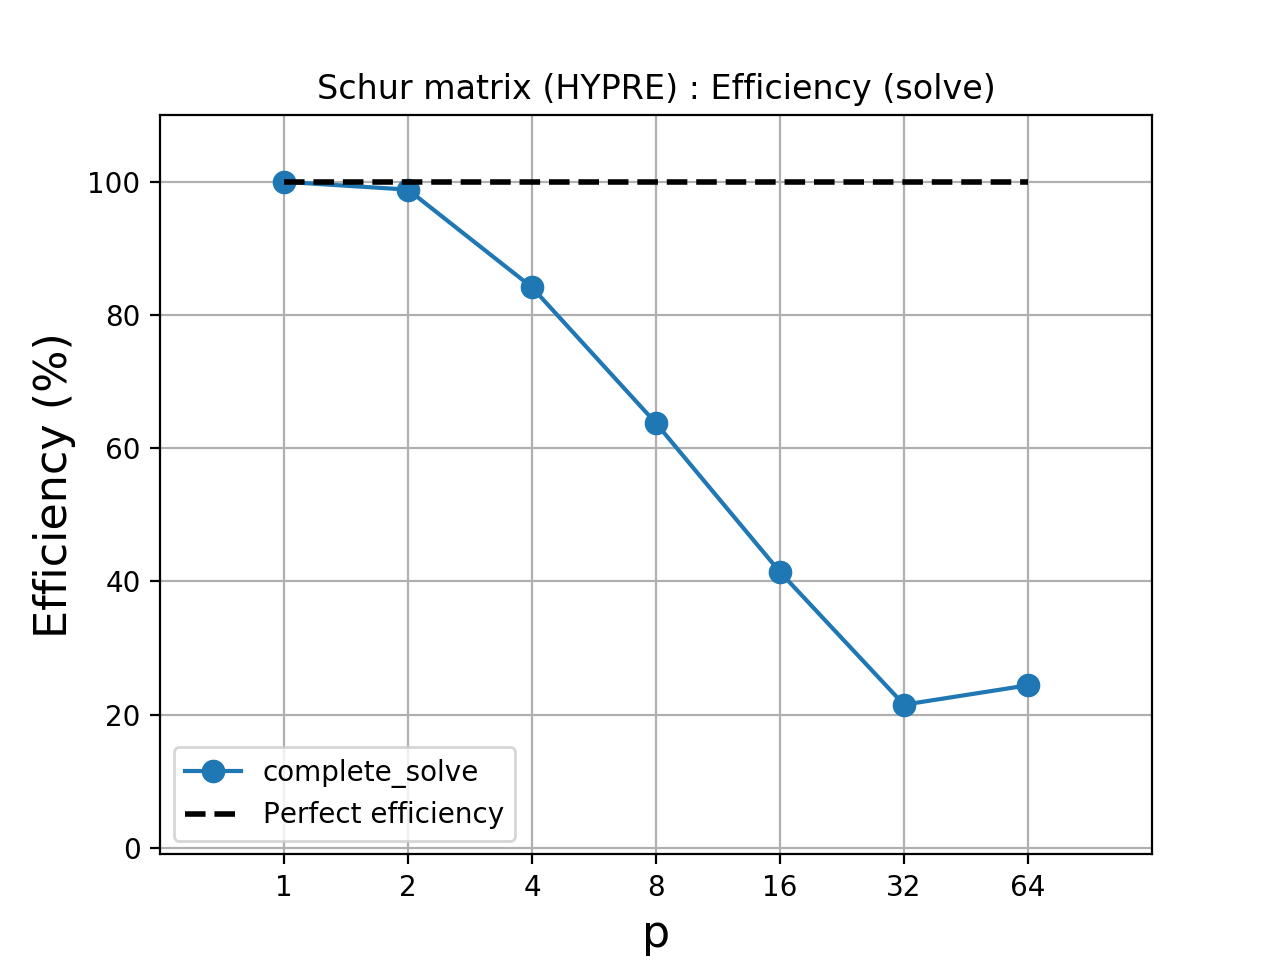

In [15]:
efficiency(df_schur_hypre,'complete_solve')
plt.title('Schur matrix (HYPRE) : Efficiency (solve)');

<a id='comparisons'></a>
<hr style="border-width:3px; border-color:coral"/>
# Comparisons between full solve and Schur matrix approach
<hr style="border-width:3px; border-color:coral"/>

In [16]:
panel = pd.Panel({'Full (HYPRE)' : df_full_hypre, 'Schur (HYPRE)' : df_schur_hypre})
procs = df_full_hypre['p']

## Comparisons : Setup

In [17]:
df_setup = panel.minor_xs('complete_setup')
df_setup.insert(0,'p',procs)
df_setup

,p,Full (HYPRE),Schur (HYPRE)
0,1,59.507668,70.778964
1,2,5770.495482,73.974354
2,4,3070.880549,122.983455
3,8,1155.094200,220.416970
4,16,307.719080,406.244538
5,32,86.368780,2.469355
6,64,28.503892,4.500250


<IPython.core.display.Javascript object>


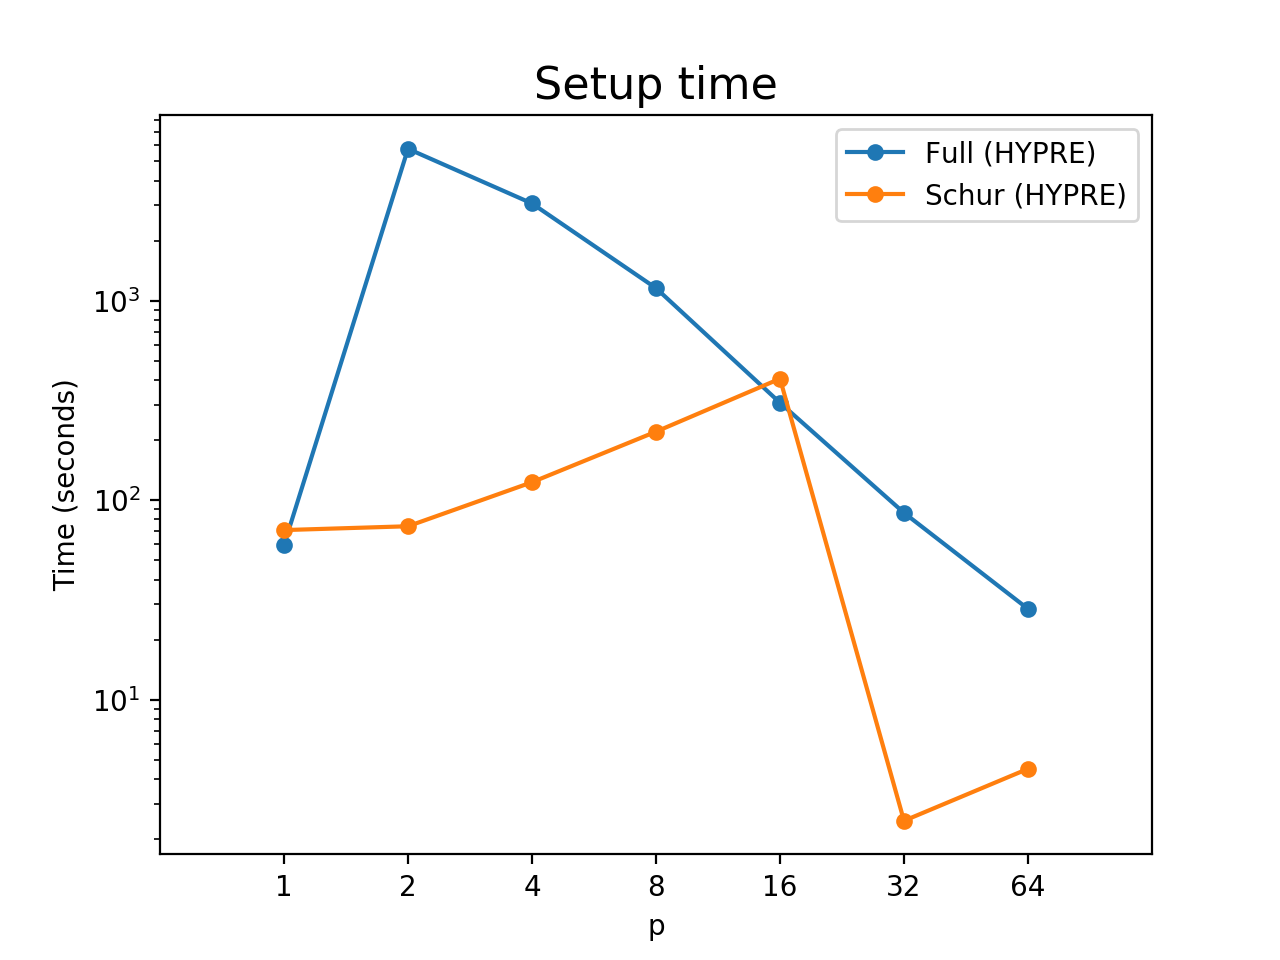

In [18]:
df_setup.plot(x='p',logx=True,logy=True,style='.-',markersize=10)
plt.xlabel('p')
plt.ylabel('Time (seconds)')
plt.title('Setup time',fontsize=16);
fix_xticks(df_setup['p'].values)

<IPython.core.display.Javascript object>


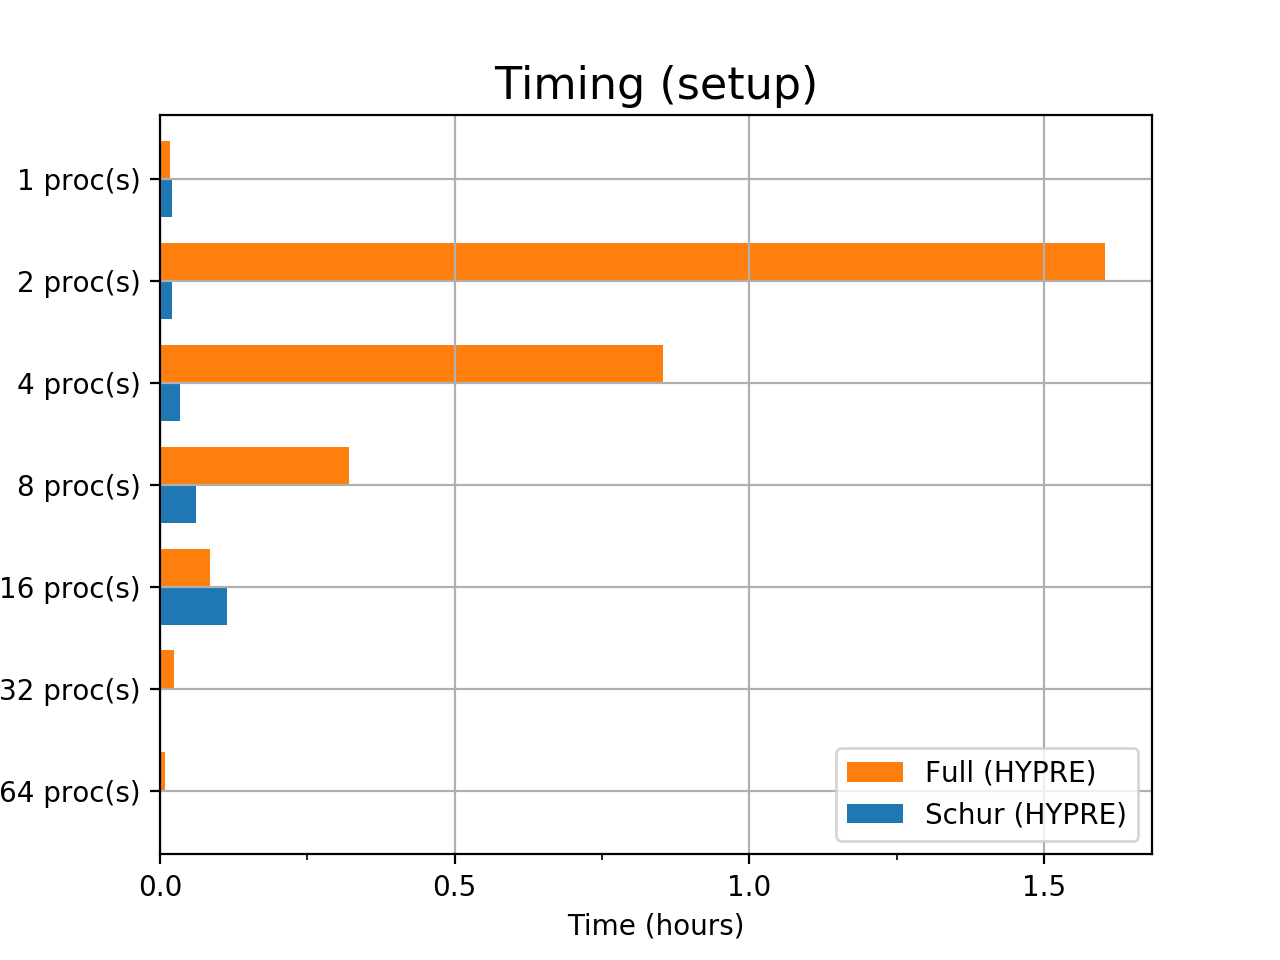

In [19]:
cols = ['Schur (HYPRE)', 'Full (HYPRE)']
bar_plot(df_setup,cols=cols)

set_xticks(0.5,0.25,units='hours')
plt.title("Timing (setup)", fontsize=16);

## Comparisons : Solve

In [20]:
df_solve = panel.minor_xs('complete_solve')
df_solve.insert(0,'p',procs)   # Insert processor counts as first column
df_solve

,p,Full (HYPRE),Schur (HYPRE)
0,1,476.602439,127.336260
1,2,190.333167,64.426933
2,4,170.231912,37.830169
3,8,141.363695,24.967027
4,16,193.314409,19.221335
5,32,38.710559,18.524171
6,64,20.028226,8.156496


<IPython.core.display.Javascript object>


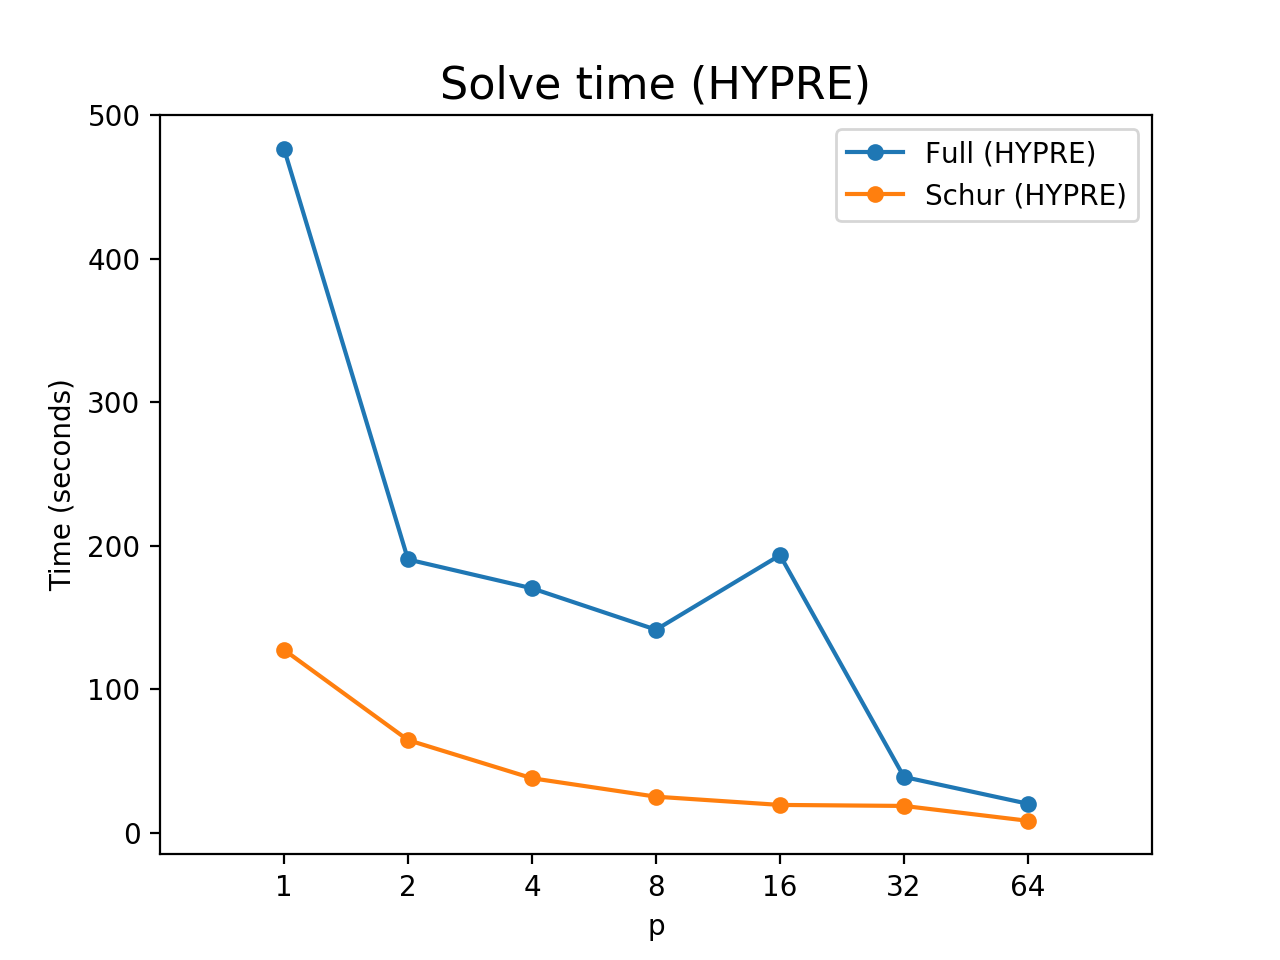

In [21]:
cols = ['p','Full (HYPRE)','Schur (HYPRE)']
df_solve[cols].plot(x='p',logx=True,logy=False,style='.-',markersize=10)
plt.xlabel('p')
plt.ylabel('Time (seconds)')
plt.title('Solve time (HYPRE)',fontsize=16);
fix_xticks(df_solve['p'].values)

<IPython.core.display.Javascript object>


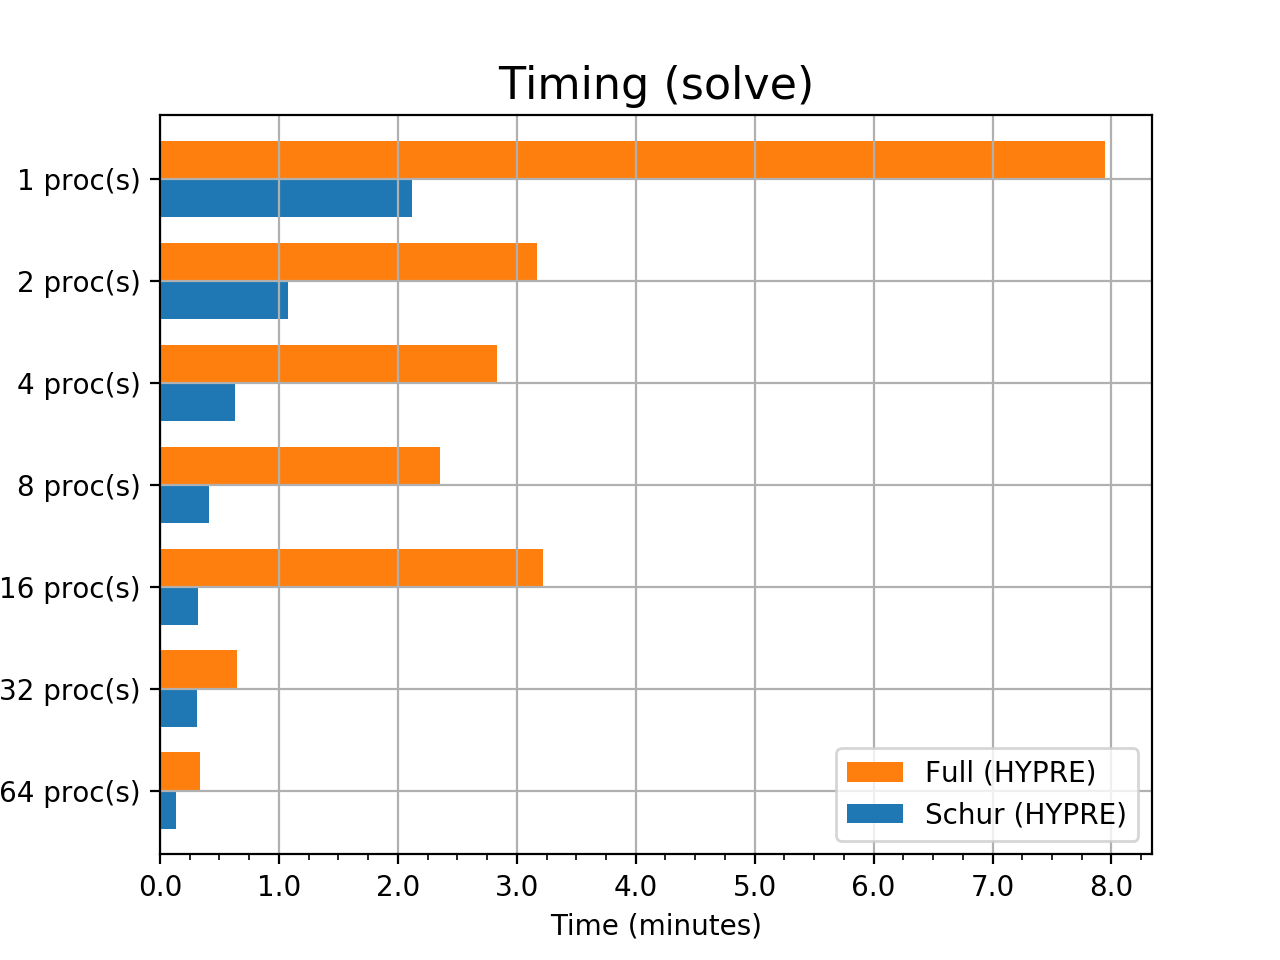

In [22]:
cols = ['Schur (HYPRE)', 'Full (HYPRE)']
bar_plot(df_solve,cols=cols)

set_xticks(1,0.25,fmt='{:.1f}'.format,units='minutes')

plt.title("Timing (solve)", fontsize=16);
